In [121]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "./city_data.csv"
ride_data_to_load = "./ride_data.csv"

# Read the City and Ride Data
right_city_read = pd.read_csv(city_data_to_load)
left_ride_read = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merge_inner = pd.merge(left_ride_read, right_city_read, how='inner', on=['city'])

# Display the data table for preview
mgr_merged_data = merge_inner.groupby('city', as_index=True)
two = mgr_merged_data.head(1)

one = two.reset_index(drop=True)
one.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


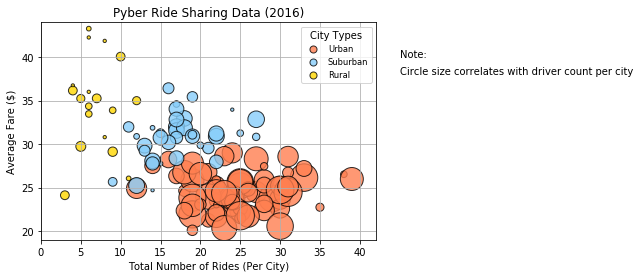

In [122]:
# Obtain the x and y coordinates for each of the three city types

mgr_city = merge_inner.groupby('city')

avg_fr = mgr_city['fare'].mean()

ride_city = mgr_city['ride_id'].count()

drive_sz = right_city_read.set_index('city')['driver_count']

city_loc = right_city_read.set_index('city')['type']


grouped_data = pd.DataFrame({"Average Fare":avg_fr,
                             "Total Rides":ride_city,
                             "Drivers Per City":drive_sz,
                             "City Type":city_loc}) 


urban = grouped_data.loc[grouped_data["City Type"] == "Urban"]
suburban = grouped_data.loc[grouped_data["City Type"] == "Suburban"]
rural = grouped_data.loc[grouped_data["City Type"] == "Rural"]

plt.scatter(urban['Total Rides'],urban['Average Fare'],
            s=urban['Drivers Per City']*11, alpha=.8, linewidths=1.0, edgecolors='black',
            color='coral', label ="Urban")

plt.scatter(suburban['Total Rides'],suburban['Average Fare'],
            s=suburban['Drivers Per City']*11, alpha=.8, linewidths=1.0, edgecolors='black',
            color='lightskyblue', label ="Suburban")

plt.scatter(rural['Total Rides'],rural['Average Fare'],
            s=rural['Drivers Per City']*11, alpha=.8, linewidths=1.0, edgecolors='black',
            color='gold', label ="Rural")
py_legend = plt.legend(loc="best", title="City Types", fontsize="small", frameon=True, markerscale=0.65)

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Averge Fare ($)")

py_legend.legendHandles[0]._sizes = [50]
py_legend.legendHandles[1]._sizes = [50]
py_legend.legendHandles[2]._sizes = [50]

plt.xlim(0,42)
plt.ylim(19,44)
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.text(45, 40, 'Note: ')
plt.text(45, 38, 'Circle size correlates with driver count per city')
plt.grid(True, alpha=1, clip_on=True)

Pyber = plt.show()
plt.show()


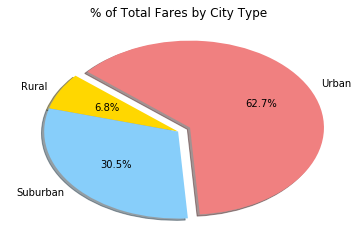

In [123]:
mgr_city = merge_inner.groupby('city')
avg_fr = mgr_city['fare'].sum()
city_loc = right_city_read.set_index('city')['type']
cleaned_data = pd.DataFrame({"Total Fare":avg_fr, "City Type":city_loc}) 
sume = cleaned_data.groupby(['City Type']).sum()

explode = (0, 0, .1)
color = ["gold", "lightskyblue", "lightcoral"]
label = ["Rural", "Suburban", "Urban"]


plt.title("% of Total Fares by City Type")

pie_totfares = plt.pie(sume, explode=explode, labels=label, colors=color, autopct="%1.1f%%", shadow=True, startangle=140)

plt.show()

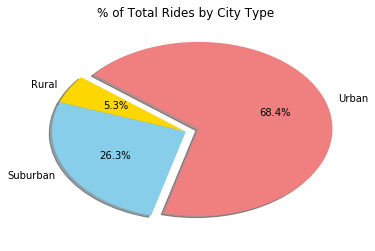

In [124]:

all_urban = urban["Total Rides"].sum()
all_suburban = suburban["Total Rides"].sum()
all_rural = rural["Total Rides"].sum()

label = ["Urban","Rural","Suburban"]
sizes = [all_urban, all_rural, all_suburban,]
explode = (0.1, 0, 0)
color = ["lightcoral", "gold", "skyblue"]
plt.title("% of Total Rides by City Type")
pie_totrides = plt.pie(sizes, explode=explode, labels=label, colors=color, autopct='%1.1f%%', shadow=True, startangle=255)
plt.show()

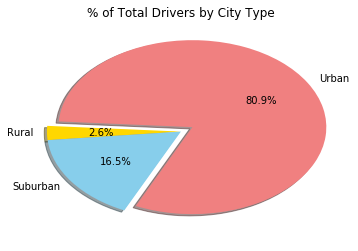

In [125]:

dr_urban = urban["Drivers Per City"].sum()
dr_suburban = suburban["Drivers Per City"].sum()
dr_rural = rural["Drivers Per City"].sum()
label = ["Urban","Rural","Suburban"]
sizes = [dr_urban,dr_rural, dr_suburban,]
explode = (0.1, 0, 0)
color = ["lightcoral", "gold", "skyblue"]
plt.title("% of Total Drivers by City Type")
pie_totdrivers = plt.pie(sizes, explode=explode, labels=label, colors=color, autopct='%1.1f%%', shadow=True,startangle=245)
plt.show()